> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - Gapminder Foundation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

The Gapminder Foundation collects and provides data on global trends relating to population growth, economics, energy, education, health and more. It was founded by Professor Hans Rosling, one of my favorite scientists, to provide insights in to what is really happening in the world backed up by data.

In this project, the following data sets have been selected:

* Yearly population by country
* Yearly CO2e emissions by country
* Yearly change in GDP (economic growth)

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

Some questions that may be asked from these data sets are:

* At what rate is the global population growing?
* What is the relation between population and CO2e emissions?
* Are increased CO2 emissions linked to economic growth (GDP)?
* How does the global numbers on this compare to regional numbers like population growth related to energy production in Africa as compared to Europe?

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

#### Data Extraction
The data is extracted from CSV files obtained from Gapminder’s github page “Gapminder Systema Globalis” (https://github.com/open-numbers/ddf--gapminder--systema_globalis).
They are loaded into Jupyter notebook using the pandas package read_csv function call. An example would be:
df_pop = pd.read_csv('ddf--datapoints--population_total--by--geo--time.csv')
All data was provided per country. To simplify the analysis, country data was aggregated into region data for:
- Africa
- Americas
- Asia
- Europe

This was done using a combined groupby() and sum() operation.

#### Go through nations and world regions
To get a grasp of each registered country of the world and how they are distributed over different world regions (continents) the 'ddf--entities--geo--country.csv' dataset is used and analyzed.

Two minor countries without an assigned world region are identified but are assumed insignificant for this analysis.

#### Data Cleaning
Each of the datasets are thoroughly analyzed and cleaned using pandas function calls such as:
- info()
- head()
- tail()
- isna()
- drop()

When this was done for each of the datasets, a “master” dataset was constructed by combining the columns using the join() and groupby() function calls in pandas.
This dataset required additional cleaning to align relevant periods of data.


In [5]:
# Load all nation codes with respective continent and other info
df_nations = pd.read_csv('ddf--entities--geo--country.csv')
df_nations.info() # 275 unique countries in nations dataset
#df_nations.head()
#df_nations['country'].unique()
#df_nations['world_4region'].unique()
df_nations[df_nations['world_4region'].isna()]
# French Clipperton island and French Antarctica not categorized as a worl_4region, but can be disregarded in this analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         275 non-null    object 
 1   gwid                            261 non-null    object 
 2   name                            275 non-null    object 
 3   geographic_regions              259 non-null    object 
 4   income_groups                   214 non-null    object 
 5   landlocked                      254 non-null    object 
 6   g77_and_oecd_countries          258 non-null    object 
 7   geographic_regions_in_4_colors  258 non-null    object 
 8   main_religion_2008              215 non-null    object 
 9   gapminder_list                  260 non-null    object 
 10  alternative_1                   69 non-null     object 
 11  alternative_2                   37 non-null     object 
 12  alternative_3                   21 n

,country,gwid,name,geographic_regions,income_groups,landlocked,g77_and_oecd_countries,geographic_regions_in_4_colors,main_religion_2008,gapminder_list,...,arb1,arb2,arb3,arb4,arb5,arb6,is--country,world_4region,latitude,longitude
49,fra_clipperton,NaN,Clipperton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
84,fra_antarc,NaN,French Southern and Antarctic Lands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN


#### Global population data
The population data of each country is read and checked. The population data for each country is summed up for each worl region and saved in the population dataframe.

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Load population data since 1800 (with projections until 2100) and group per continent (world_4region)
df_pop = pd.read_csv('ddf--datapoints--population_total--by--geo--time.csv')
#df_pop.head()
#df_pop['population_total'].isna().values.any() # All countries with population value for all years
#len(df_pop['geo'].unique()) # 197 unique countries in population dataset - we assume it's the ones not included have insignificant populations

# Group population per continent (world_4region)
df_pop = df_pop.join(df_nations[['country', 'world_4region']].set_index('country'), on='geo')
df_pop = df_pop.groupby(['time', 'world_4region']).sum('population_total')
df_pop.head()

population_total
time world_4region                  
1800 africa                 81209567
     americas               23556679
     asia                  672521875
     europe                206910570
1801 africa                 81313551

In [7]:
def plot_by_time(df_plot):
    df_plot.groupby('time').sum().plot()

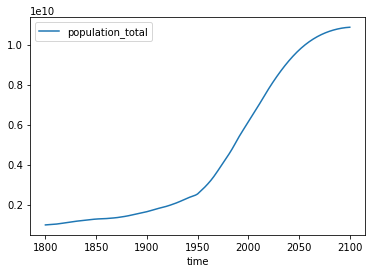

In [8]:
# Print world population over time since 1800 with projections to 2100 - looks reasonable
# We'll be more than 10 billion people in 100 years if this holds
plot_by_time(df_pop)

#### Global CO2 emissions data
The CO2 emissions data of each country is checked. Like the population data, the country-wise data is summed and transformed into world region-wise data.

In [9]:
# Read CO2 emissions by country data
df_co2 = pd.read_csv('ddf--datapoints--yearly_co2_emissions_1000_tonnes--by--geo--time.csv')
#df_co2.head()
#df_co2.info()
# len(df_co2['geo'].unique()) # 232 unique countries in CO2 dataset

# Group CO2 emissions per continent (world_4region)
df_co2 = df_co2.join(df_nations[['country', 'world_4region']].set_index('country'), on='geo')
df_co2 = df_co2.groupby(['time', 'world_4region']).sum('yearly_co2_emissions_1000_tonnes')
df_co2.head()

,,yearly_co2_emissions_1000_tonnes
time,world_4region,
1751,europe,9358.184
1752,europe,9361.851
1753,europe,9361.851
1754,europe,9365.518
1755,europe,9369.185


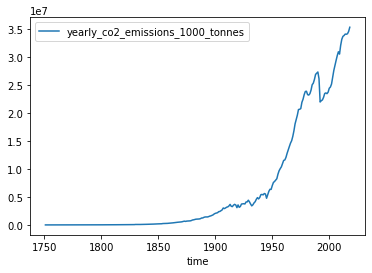

In [10]:
plot_by_time(df_co2)

#### GDP growth data
The economic (GDP) growth data is checked and summed up for each world region.

In [11]:
df_gdp = pd.read_csv('ddf--datapoints--gdp_total_yearly_growth--by--geo--time.csv')
df_gdp = df_gdp.join(df_nations[['country', 'world_4region']].set_index('country'), on='geo')
df_gdp = df_gdp.groupby(['time', 'world_4region']).sum('gdp_total_yearly_growth')
plot_bytime(df_gdp)

NameError: name 'plot_bytime' is not defined


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

#### Compiling all data
The population, CO2 emissions and GDP growth data is put into one single dataframe for convenience. The data is checked for null/NaN values and aligned based on for which time-periods data exists in order to enable a relevant analysis later on.

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df = df_pop.join(df_co2, on=['time', 'world_4region'])
df = df.join(df_gdp, on=['time', 'world_4region'])
df.drop(df.tail(348).index, inplace = True) # Remove all data after 2013 as it is 1) projections and 2) doesn't align with CO2e and GDP
#df.tail()
df.drop(df.head(336).index, inplace = True) # Remove all data before 1884 as NaN values exist for this period for CO2e and GDP
df.head()
df = df.reset_index()

In [13]:
if df['population_total'].isna().values.any():
    print("Population total contains NaN values")
elif df['yearly_co2_emissions_1000_tonnes'].isna().values.any():
    print("Yearly CO2 emissions contains NaN values")
elif df['gdp_total_yearly_growth'].isna().values.any():
    print("GDP data contains NaN values")
else:
    print("Dataset is now OK!")

Dataset is now OK!


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: Does CO2 emissions corrolate with population and is it consistent for all parts of the world?

#### Population over time for each world region
The following graph shows the population over time for each world region.

In [34]:
def lineplot_by_region(df_plot, x_key, y_key):
    plt.figure(figsize=(16, 8))

    regions = df_plot['world_4region'].unique()

    for r in regions:
        region_data = df[df['world_4region'] == r]
        plt.plot(region_data[x_key], region_data[y_key], label=r)
        
    plt.legend()

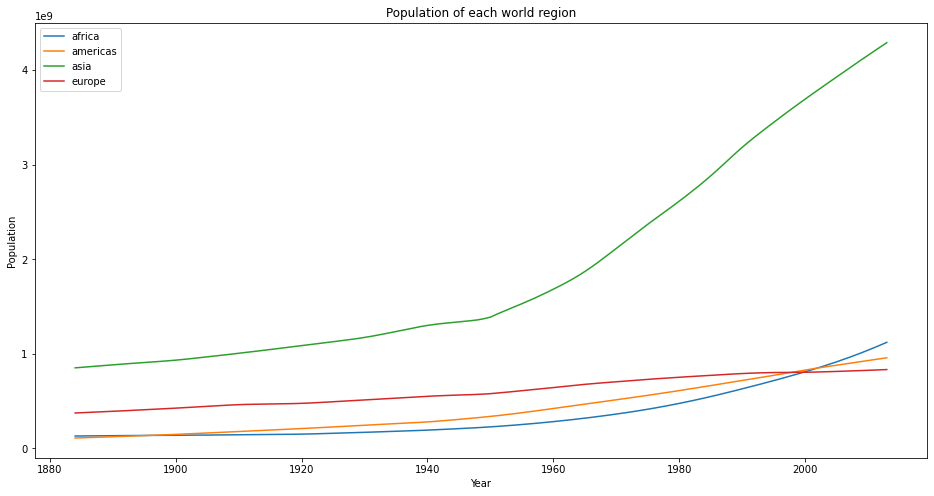

In [35]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
lineplot_by_region(df, 'time', 'population_total')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of each world region')
plt.show()

#### CO2 emission rate over time for each world region
The following graph shows the CO2 emission rate over time for each world region.

There is some anomaly for Europe around 1990. It is not clear if this is some error in the data or due to some event (end of Soviet Union?) at the time.

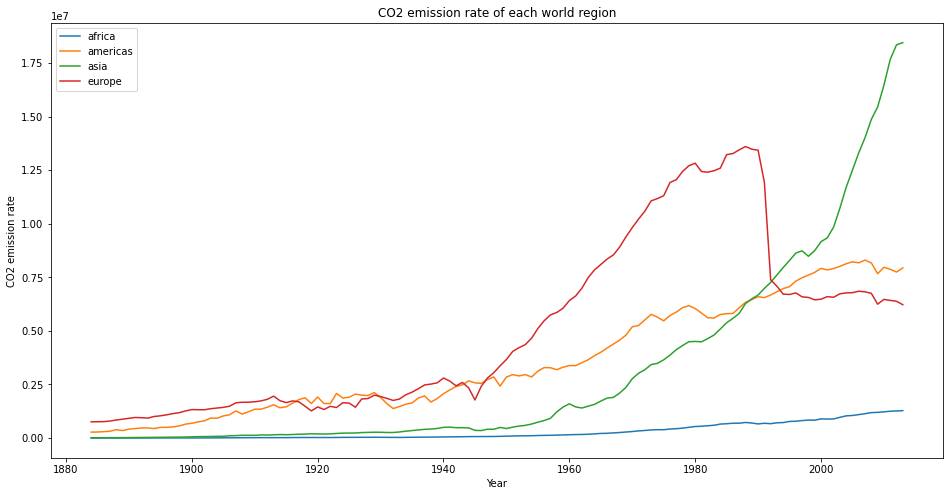

In [36]:
lineplot_by_region(df, 'time', 'yearly_co2_emissions_1000_tonnes')
plt.xlabel('Year')
plt.ylabel('CO2 emission rate')
plt.title('CO2 emission rate of each world region')
plt.legend()
plt.show()

#### CO2 emission rate per capita over time for each world region
The following graph shows the CO2 emission rate per capita over time for each world region.

There is some anomaly for Europe around 1990. It is not clear if this is some error in the data or due to some event (end of Soviet Union?) at the time.

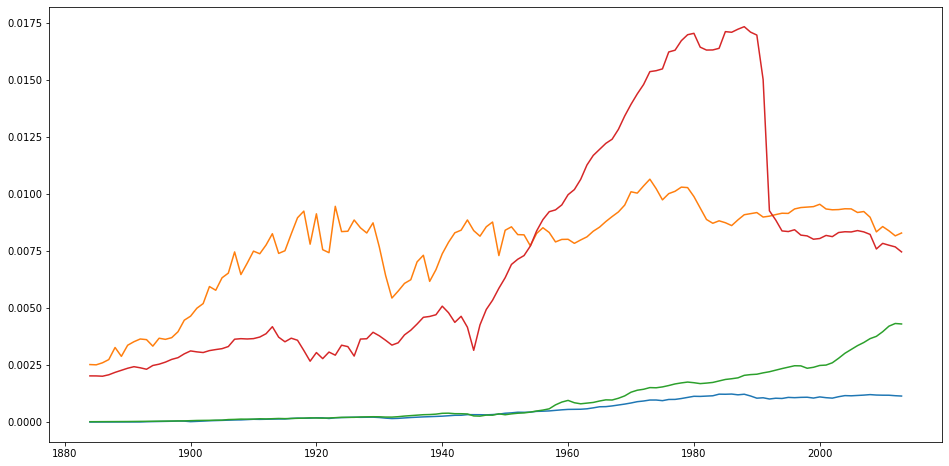

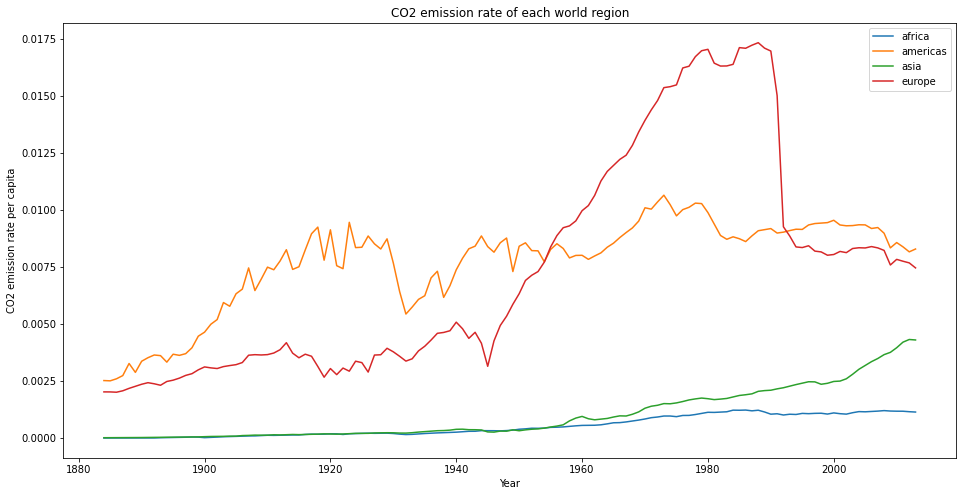

In [39]:
# CO2 emissions Per capita
plt.figure(figsize=(16, 8))

regions = df['world_4region'].unique()

for r in regions:
    region_data = df[df['world_4region'] == r]
    plt.plot(region_data['time'], region_data['yearly_co2_emissions_1000_tonnes']/region_data['population_total'], label=r)

lineplot_by_region(df, 'time', 'yearly_co2_emissions_1000_tonnes_per_capita')
plt.xlabel('Year')
plt.ylabel('CO2 emission rate per capita')
plt.title('CO2 emission rate of each world region')
plt.legend()
plt.show()

#### Scatter plot: CO2 emission rate vs population
To check the correlation of CO2 emissions and population, the following scatter plot is created. Clearly, different region have different correlation factors, but all population increase correlates positively with increased emissions.

In [43]:
def scatterplot_by_region(df, x_key, y_key):
    plt.figure(figsize=(16, 8))

    regions = df['world_4region'].unique()

    for r in regions:
        region_data = df[df['world_4region'] == r]
        plt.scatter(region_data[x_key], region_data[y_key], label=r)

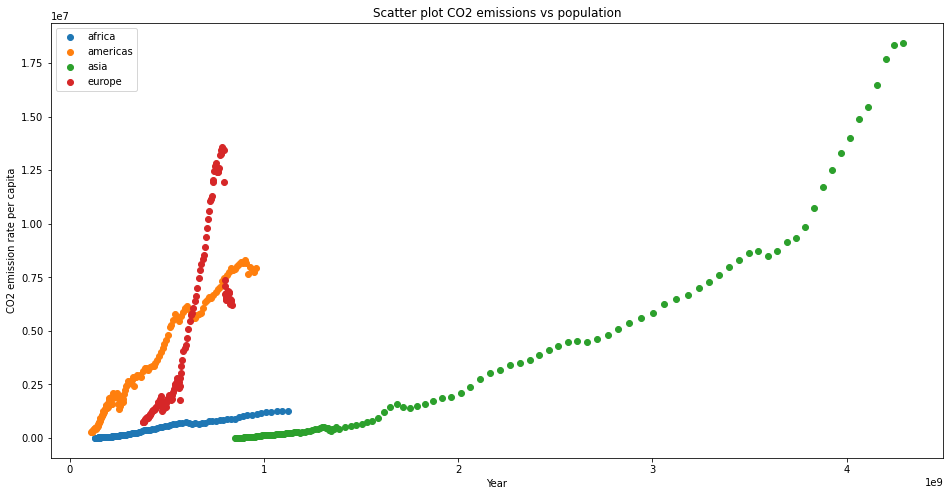

In [44]:
# CO2 emissions Per capita
scatterplot_by_region(df, 'population_total', 'yearly_co2_emissions_1000_tonnes')
plt.xlabel('Year')
plt.ylabel('CO2 emission rate per capita')
plt.title('Scatter plot CO2 emissions vs population')
plt.legend()
plt.show()

### Research Question 2: How does economic growth relate to CO2 emissions?

#### CO2 emissions and GDP growth
In the following plots, GDP growth is analyzed for different regions and related to CO2 emissions. No clear pattern between GDP growth and CO2 emissions emerges clearly from data.

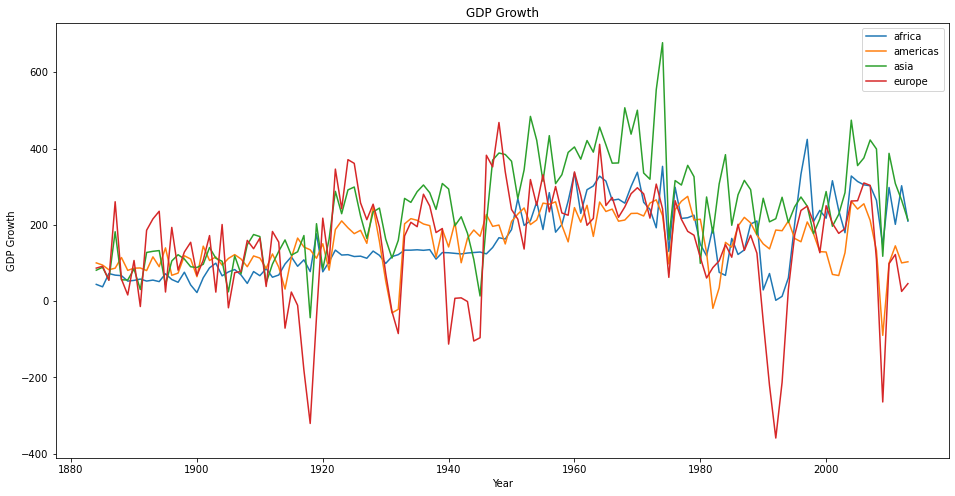

In [45]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
lineplot_by_region(df, 'time', 'gdp_total_yearly_growth')
plt.xlabel('Year')
plt.ylabel('GDP Growth')
plt.title('GDP Growth')
plt.legend()
plt.show()

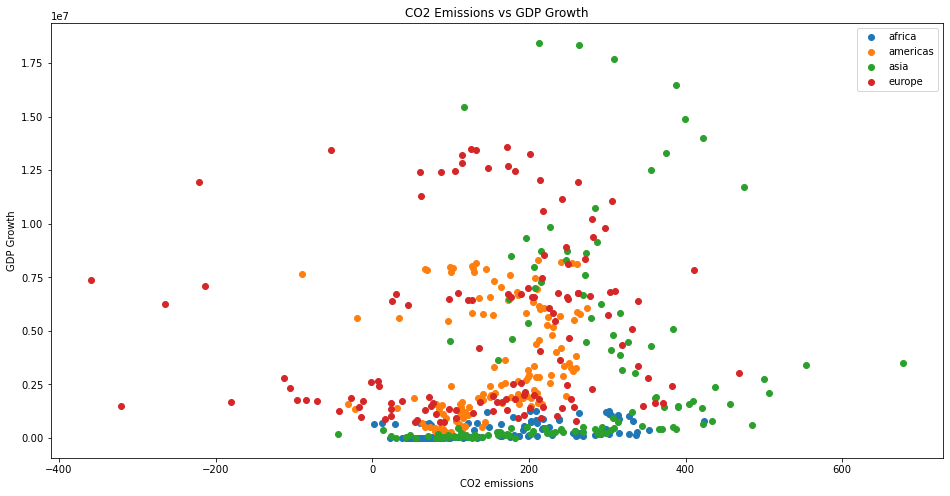

In [46]:
# CO2 emissions vs GDP growth scatter
scatterplot_by_region(df, 'gdp_total_yearly_growth', 'yearly_co2_emissions_1000_tonnes')
plt.xlabel('CO2 emissions')
plt.ylabel('GDP Growth')
plt.title('CO2 Emissions vs GDP Growth')
plt.legend()
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

The analysis shows that there is a clear correlation between population growth and CO2 emissions in all world regions. However, the positive correlation factor between regions can vary in magnitude (Africa lowest correlation, Europe high correlation).

World population is also steadily growing, most rapidly in Asia and Africa.

The analysis also shows that there is no clear correlation between GDP growth and CO2 emissions. No pattern can be discerned frow the data.

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

As the analysis originates from 3 separate datasets, it is possible that some countries data has been missed or not included in all datasets.

Also, a possible anomaly is the data is noted in the European CO2 emissions data at around year 1990. The background of this anomaly is unknown.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [230]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1